In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import glob
import os

import tensorflow as tf


## Data understanding
1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create a dataframe which summarizes the image, path & captions as a dataframe

4.Create a list which contains all the captions & path

5.Visualise the top 30 occuring words in the captions


In [2]:
#Import the dataset and read the image into a seperate variable

images='/kaggle/input/flickr8k/Images'

all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


In [3]:
#Import the dataset and read the text file into a seperate variable

def load_doc(filename):
    
    #your code here
    f = open(filename, "r")
    text = f.read()
    f.close()
    
    return text
text_file = '/kaggle/input/flickr8k/captions.txt'
doc = load_doc(text_file)
print(doc[:300])

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing


Create a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [4]:
# Creating the data frame from captions file
df = pd.read_csv(text_file)
df.columns =['ID', 'Captions']
df.head()

,ID,Captions
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [5]:
# Adding path of the image as a new column
df['Path'] = df['ID'].apply(lambda x:images+"/"+x)

In [6]:
df.head()

,ID,Captions,Path
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,/kaggle/input/flickr8k/Images/1000268201_693b0...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,/kaggle/input/flickr8k/Images/1000268201_693b0...
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .,/kaggle/input/flickr8k/Images/1000268201_693b0...
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...,/kaggle/input/flickr8k/Images/1000268201_693b0...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...,/kaggle/input/flickr8k/Images/1000268201_693b0...


In [7]:
len(df)

40455

In [8]:
#function to clean the text and add <start> and <end> tokens
import re
def clean_text(text):    
    text=re.sub("[^a-z]"," ",text)
    text = text.strip()
    text=text.lower()
    text="<start> "+text.strip()+" <end>"
    return text.strip()

In [9]:
df['Cleaned_Caption'] = df['Captions'].apply(lambda x:clean_text(x))

In [10]:
df.head()

,ID,Captions,Path,Cleaned_Caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,/kaggle/input/flickr8k/Images/1000268201_693b0...,<start> child in a pink dress is climbing up a...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,/kaggle/input/flickr8k/Images/1000268201_693b0...,<start> girl going into a wooden building <end>
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .,/kaggle/input/flickr8k/Images/1000268201_693b0...,<start> little girl climbing into a wooden pla...
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...,/kaggle/input/flickr8k/Images/1000268201_693b0...,<start> little girl climbing the stairs to her...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...,/kaggle/input/flickr8k/Images/1000268201_693b0...,<start> little girl in a pink dress going into...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               40455 non-null  object
 1   Captions         40455 non-null  object
 2   Path             40455 non-null  object
 3   Cleaned_Caption  40455 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


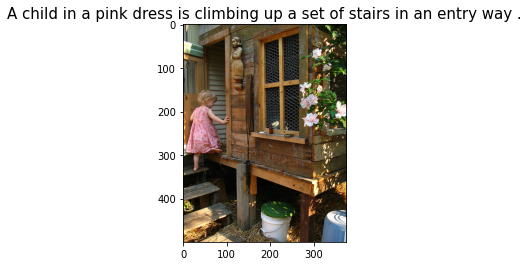

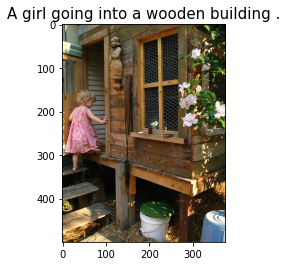

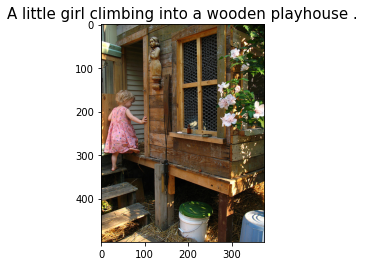

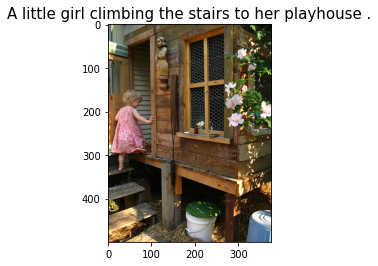

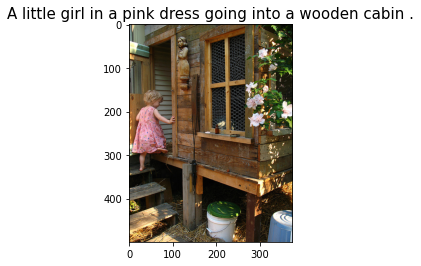

In [12]:
#Visualise both the images & text present in the dataset
from PIL import Image
for x in range(0,5):
    img = Image.open(df['Path'][x])
    plt.imshow(img,)
    plt.title(df['Captions'][x],fontdict={'fontsize':15})
    plt.show()


In [13]:
#Create the vocabulary & the counter for the captions
from keras.preprocessing.text import Tokenizer

vocabulary= Tokenizer()
vocabulary.fit_on_texts(df['Captions'])
val_count = len(vocabulary.word_index)
val_count

8493

In [14]:
#creating data frame from the vocabulary
df_wordcounts = pd.DataFrame(vocabulary.word_counts.items(),columns=['word','count'])
df_wordcounts.head()

,word,count
0,a,62992
1,child,1545
2,in,18986
3,pink,739
4,dress,348


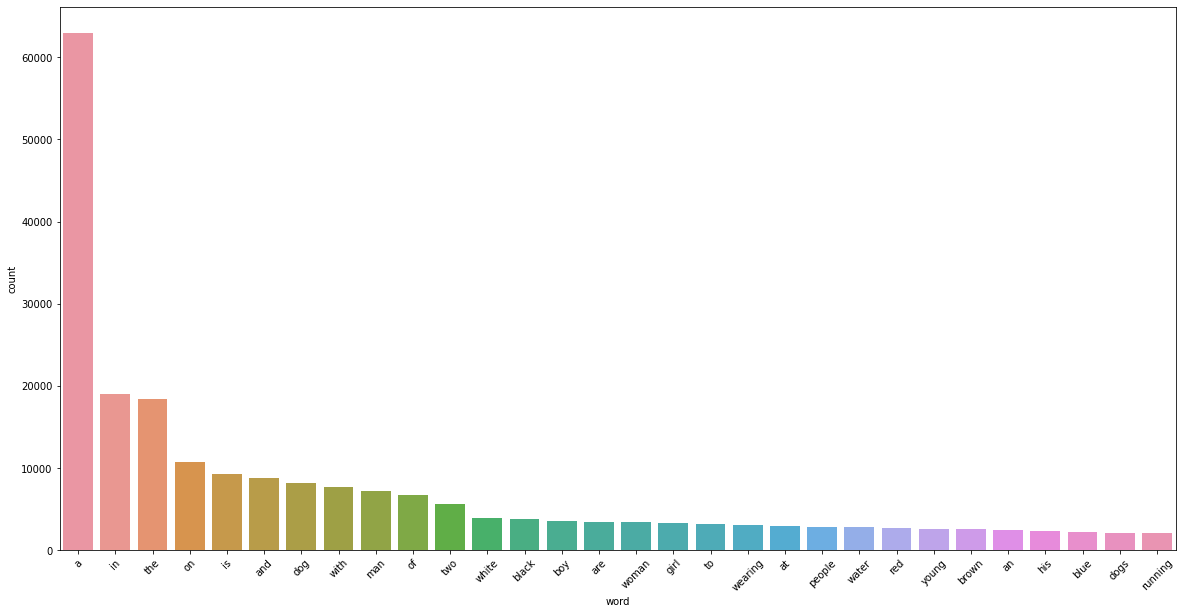

In [15]:
df_top30_words = df_wordcounts.sort_values(by='count',ascending=False).head(30)
plt.figure(figsize=[20,10])
sns.barplot(x=df_top30_words['word'],y=df_top30_words['count'])
plt.xticks(rotation=45)
plt.show()

## Pre-Processing the captions

1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

In [16]:
# create the tokenizer
tknzr = Tokenizer(
    num_words=5000,
    filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ',
    oov_token='<UNK>'
)


In [17]:
tknzr.fit_on_texts(df['Cleaned_Caption'])
txt_to_seqs = tknzr.texts_to_sequences(df['Cleaned_Caption'])

In [18]:
list(df['Cleaned_Caption'][:5])

['<start> child in a pink dress is climbing up a set of stairs in an entry way <end>',
 '<start> girl going into a wooden building <end>',
 '<start> little girl climbing into a wooden playhouse <end>',
 '<start> little girl climbing the stairs to her playhouse <end>',
 '<start> little girl in a pink dress going into a wooden cabin <end>']

In [19]:
#first 5 sequences
txt_to_seqs[:5]

[[2, 45, 5, 4, 92, 177, 8, 122, 52, 4, 404, 13, 405, 5, 31, 1, 687, 3],
 [2, 21, 322, 64, 4, 200, 121, 3],
 [2, 42, 21, 122, 64, 4, 200, 2491, 3],
 [2, 42, 21, 122, 6, 405, 22, 60, 2491, 3],
 [2, 42, 21, 5, 4, 92, 177, 322, 64, 4, 200, 3070, 3]]

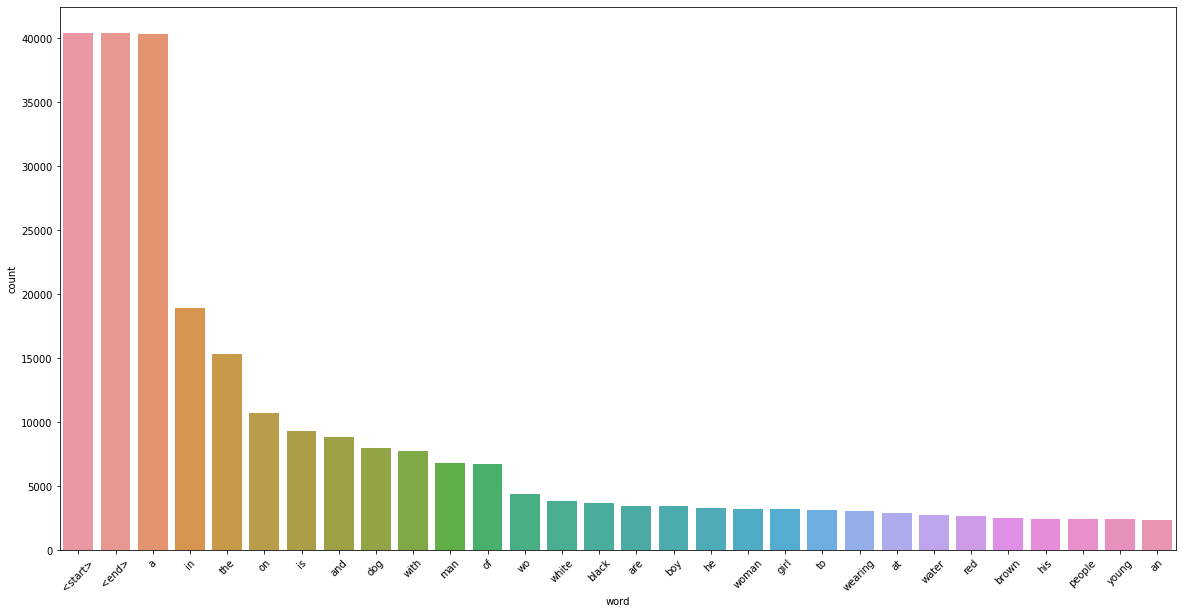

In [20]:
#visulize the Top 30 occuring words after text processing
df_wordcounts = pd.DataFrame(tknzr.word_counts.items(),columns=['word','count'])
df_top30_words = df_wordcounts.sort_values(by='count',ascending=False).head(30)
plt.figure(figsize=[20,10])
sns.barplot(x=df_top30_words['word'],y=df_top30_words['count'])
plt.xticks(rotation=45)
plt.show()

In [21]:
from keras.preprocessing.sequence import pad_sequences

In [22]:
# Pad each vector to the max_length of the captions ^ store it to a vairable
max_length_seq = len(pd.DataFrame(txt_to_seqs).columns)
print('max length sequence in the dataset is '+str(max_length_seq))
caption_vector = pad_sequences(txt_to_seqs, padding='post', maxlen=max_length_seq)
print("The shape of Caption vector is :" + str(caption_vector.shape))

max length sequence in the dataset is 38
The shape of Caption vector is :(40455, 38)


In [23]:
caption_vector

array([[  2,  45,   5, ...,   0,   0,   0],
       [  2,  21, 322, ...,   0,   0,   0],
       [  2,  42,  21, ...,   0,   0,   0],
       ...,
       [  2,  48,   5, ...,   0,   0,   0],
       [  2,  88, 373, ...,   0,   0,   0],
       [  2,  88, 373, ...,   0,   0,   0]], dtype=int32)

In [24]:
#Add caption vector with padding to dataframe
df['Caption_Vector_Padded'] = caption_vector.tolist()

In [25]:
df.head()

,ID,Captions,Path,Cleaned_Caption,Caption_Vector_Padded
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,/kaggle/input/flickr8k/Images/1000268201_693b0...,<start> child in a pink dress is climbing up a...,"[2, 45, 5, 4, 92, 177, 8, 122, 52, 4, 404, 13,..."
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,/kaggle/input/flickr8k/Images/1000268201_693b0...,<start> girl going into a wooden building <end>,"[2, 21, 322, 64, 4, 200, 121, 3, 0, 0, 0, 0, 0..."
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .,/kaggle/input/flickr8k/Images/1000268201_693b0...,<start> little girl climbing into a wooden pla...,"[2, 42, 21, 122, 64, 4, 200, 2491, 3, 0, 0, 0,..."
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...,/kaggle/input/flickr8k/Images/1000268201_693b0...,<start> little girl climbing the stairs to her...,"[2, 42, 21, 122, 6, 405, 22, 60, 2491, 3, 0, 0..."
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...,/kaggle/input/flickr8k/Images/1000268201_693b0...,<start> little girl in a pink dress going into...,"[2, 42, 21, 5, 4, 92, 177, 322, 64, 4, 200, 30..."


## Pre-processing the images

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. 

### FAQs on how to resize the images::
* Since you have a list which contains all the image path, you need to first convert them to a dataset using <i>tf.data.Dataset.from_tensor_slices</i>. Once you have created a dataset consisting of image paths, you need to apply a function to the dataset which will apply the necessary preprocessing to each image. 
* This function should resize them and also should do the necessary preprocessing that it is in correct format for InceptionV3.


In [26]:
df['Path'].unique()

array(['/kaggle/input/flickr8k/Images/1000268201_693b08cb0e.jpg',
       '/kaggle/input/flickr8k/Images/1001773457_577c3a7d70.jpg',
       '/kaggle/input/flickr8k/Images/1002674143_1b742ab4b8.jpg', ...,
       '/kaggle/input/flickr8k/Images/99679241_adc853a5c0.jpg',
       '/kaggle/input/flickr8k/Images/997338199_7343367d7f.jpg',
       '/kaggle/input/flickr8k/Images/997722733_0cb5439472.jpg'],
      dtype=object)

In [27]:
#write your code here for creating the function. This function should return images & their path
def load_image(image_path):
    #write your pre-processing steps here
    img = tf.io.read_file(image_path)
    img = tf.io.decode_jpeg(img, channels = 3)
    img = tf.image.resize(img,(299,299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

2023-01-12 15:55:08.890096: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-12 15:55:09.040797: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-12 15:55:09.041596: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-12 15:55:09.044502: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

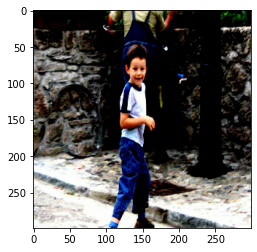

In [28]:
plt.imshow(load_image(df['Path'][40])[0])
plt.show()

In [29]:
#write your code here for applying the function to the image path dataset, such that the transformed dataset should contain images & their path

all_img_paths = df['Path'].unique()

#setting Batch Size to 64
batch_size = 64
autotune = tf.data.experimental.AUTOTUNE
image_dataset = tf.data.Dataset.from_tensor_slices(all_img_paths).map(load_image, num_parallel_calls=autotune).batch(batch_size)

In [30]:
image_dataset

<BatchDataset shapes: ((None, 299, 299, 3), (None,)), types: (tf.float32, tf.string)>

## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of the images using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



In [31]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input = image_model.input#write code here to get the input of the image_model
hidden_layer = image_model.layers[-1].output#write code here to get the output of the image_model

image_features_extract_model =   tf.keras.Model(new_input,hidden_layer)  #build the final model using both input & output layer

87924736/87910968 [==============================] - 1s 0us/step


In [32]:
image_features_extract_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [33]:
temp =   '/kaggle/input/flickr8k/Images/1000268201_693b08cb0e.jpg'
print(os.path.basename(temp))

1000268201_693b08cb0e.jpg


In [34]:
# write the code to apply the feature_extraction model to your earlier created dataset which contained images & their respective paths
# Once the features are created, you need to reshape them such that feature shape is in order of (batch_size, 8*8, 2048)
for im,pth in image_dataset:
    btch_ftrs = image_features_extract_model(im)
    btch_ftrs = tf.reshape(btch_ftrs,(btch_ftrs.shape[0],64,btch_ftrs.shape[3]))
    
    for bf, p in zip(btch_ftrs, pth):
        path_of_feature = p.numpy().decode("utf-8")
        path_of_feature1 = os.path.basename(path_of_feature)
        path_of_feature2 = './'+path_of_feature1
        np.save(path_of_feature2, bf.numpy())

2023-01-12 15:55:15.268353: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-01-12 15:55:16.913709: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


In [90]:
bf.shape

TensorShape([64, 2048])

### FAQs on how to store the features:
* You can store the features using a dictionary with the path as the key and values as the feature extracted by the inception net v3 model OR
* You can store using numpy(np.save) to store the resulting vector.

## Dataset creation
1.Apply train_test_split on both image path & captions to create the train & test list. Create the train-test spliit using 80-20 ratio & random state = 42

2.Create a function which maps the image path to their feature. 

3.Create a builder function to create train & test dataset & apply the function created earlier to transform the dataset

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 8*8, 2048)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [36]:
df.head()

,ID,Captions,Path,Cleaned_Caption,Caption_Vector_Padded
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,/kaggle/input/flickr8k/Images/1000268201_693b0...,<start> child in a pink dress is climbing up a...,"[2, 45, 5, 4, 92, 177, 8, 122, 52, 4, 404, 13,..."
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,/kaggle/input/flickr8k/Images/1000268201_693b0...,<start> girl going into a wooden building <end>,"[2, 21, 322, 64, 4, 200, 121, 3, 0, 0, 0, 0, 0..."
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .,/kaggle/input/flickr8k/Images/1000268201_693b0...,<start> little girl climbing into a wooden pla...,"[2, 42, 21, 122, 64, 4, 200, 2491, 3, 0, 0, 0,..."
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...,/kaggle/input/flickr8k/Images/1000268201_693b0...,<start> little girl climbing the stairs to her...,"[2, 42, 21, 122, 6, 405, 22, 60, 2491, 3, 0, 0..."
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...,/kaggle/input/flickr8k/Images/1000268201_693b0...,<start> little girl in a pink dress going into...,"[2, 42, 21, 5, 4, 92, 177, 322, 64, 4, 200, 30..."


In [37]:
#write your code here
from sklearn.model_selection import train_test_split

path_train, path_test, cap_train, cap_test = train_test_split(df['Path'],df['Caption_Vector_Padded'] ,random_state=42,train_size=0.8)

In [38]:
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(cap_train)))
print("Testing data for Captions: " + str(len(cap_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


In [39]:
# Create a function which maps the image path to their feature. 
# This function will take the image_path & caption and return it's feature & respective caption.
def map_func(img_path,img_caption):
    path_of_feature = img_path.numpy().decode("utf-8")
    path_of_feature1 = os.path.basename(path_of_feature)
    path_of_feature2 = './'+path_of_feature1    
    img_tensor = np.load(path_of_feature2+'.npy')# write your code here to extract the features from the dictionary stored earlier
    return img_tensor,img_caption 

### FAQs on how to load the features:
* You can load the features using the dictionary created earlier OR
* You can store using numpy(np.load) to load the feature vector.

In [40]:
# create a builder function to create dataset which takes in the image path & captions as input
# This function should transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier

def gen_dataset(img_paths,captions,batch_size=32):
    
    # your code goes here to create the dataset & transform it
    dataset = tf.data.Dataset.from_tensor_slices((img_paths, captions))
    
    dataset = dataset.map(lambda item1, item2: tf.py_function(map_func, [item1, item2], [tf.float32, tf.int32]), num_parallel_calls=tf.data.experimental.AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    
    return dataset



In [41]:
train_dataset=gen_dataset(path_train.to_list(),cap_train.to_list(),64)
test_dataset=gen_dataset(path_test.to_list(),cap_test.to_list(),64)

In [42]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,max_len)

(64, 64, 2048)
(64, 38)


## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [43]:
embedding_dim = 256 
units = 512
vocab_size = 5001#top 5,000 words +1
train_num_steps = len(path_train)//batch_size  #len(total train images) // BATCH_SIZE
test_num_steps = len(path_test)//batch_size#len(total test images) // BATCH_SIZE

### Encoder

In [44]:
class Encoder(tf.keras.Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embedding_dim)#build your Dense layer with relu activation
        #self.dropout = tf.keras.layers.Dropout(0.5)
    def call(self, features):
        features =  self.dense(features)# extract the features from the image shape: (batch, 8*8, embed_dim)
        features = tf.keras.activations.relu(features)
        return features

In [45]:
encoder=Encoder(embedding_dim)

### Attention model

In [46]:
class Attention_model(tf.keras.Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)#build your Dense layer
        self.W2 = tf.keras.layers.Dense(units)#build your Dense layer
        self.V = tf.keras.layers.Dense(1)#build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        hidden_with_time_axis =  tf.expand_dims(hidden, 1)# Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        score = tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis))# build your score funciton to shape: (batch_size, 8*8, units)
        attention_weights =  tf.keras.activations.softmax(self.V(score), axis=1) # extract your attention weights with shape: (batch_size, 8*8, 1)
        context_vector = attention_weights * features #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis = 1)# reduce the shape to (batch_size, embedding_dim)
        

        return context_vector, attention_weights

### Decoder

In [47]:
class Decoder(tf.keras.Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units)#iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim)#build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size)   #build your Dense layer

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden)#create your context vector & attention weights from attention model
        embed = self.embed(x)# embed your input to shape: (batch_size, 1, embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1)# Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed) # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)

        return output,state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [48]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [49]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tknzr.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 5001)
Attention weights shape from Decoder: (64, 64, 1)


## Model training & optimization
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [50]:
optimizer = tf.keras.optimizers.Adam()#define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')#define your loss object

In [51]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [52]:
checkpoint_path = "./checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [53]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

* While creating the training step for your model, you will apply Teacher forcing.
* Teacher forcing is a technique where the target/real word is passed as the next input to the decoder instead of previous prediciton.

In [54]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    #hidden = decoder.reset_state(batch_size=target.shape[0]) #we dont have reset_state method
    hidden = decoder.init_state(batch_size=target.shape[0])

    dec_input = tf.expand_dims([tknzr.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape: #Record operations for automatic differentiation for implementing backpropagation
        #write your code here to do the training steps
        encoder_output = encoder(img_tensor)

        # Using the teacher forcing technique where the target word is passed as the next input to the decoder
        for t in range(1, target.shape[1]):
            
            
          # passing encoder_output to the decoder
            predictions, hidden, _ = decoder(dec_input, encoder_output, hidden)

            loss += loss_function(target[:, t], predictions)

            dec_input = tf.expand_dims(target[:, t], 1)
    
    avg_loss = (loss / int(target.shape[1])) #we are calculating average loss for every batch

    tot_trainables_variables = encoder.trainable_variables + decoder.trainable_variables
    
    grads = tape.gradient(loss, tot_trainables_variables) # to calculate gradients with respect to every trainable variable

    #compute gradients and apply it to the optimizer and backpropagate.
    optimizer.apply_gradients(zip(grads, tot_trainables_variables)) 
        
    return loss, avg_loss

* While creating the test step for your model, you will pass your previous prediciton as the next input to the decoder.

In [55]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    #hidden = decoder.reset_state(batch_size=target.shape[0]) #we dont have reset_state method
    hidden = decoder.init_state(batch_size=target.shape[0])

    dec_input = tf.expand_dims([tknzr.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape: #Record operations for automatic differentiation.
        #write your code here to do the training steps
        encoder_output = encoder(img_tensor)

        # Using the teacher forcing technique where the target word is passed as the next input to the decoder.
        for t in range(1, target.shape[1]):
            
          # passing encoder_output to the decoder
            predictions, hidden, _ = decoder(dec_input, encoder_output, hidden)

            loss += loss_function(target[:, t], predictions) 

          # using teacher forcing
            dec_input = tf.expand_dims(target[:, t], 1)
    
    avg_loss = (loss / int(target.shape[1]))#we are calculating average loss for every batch

    tot_trainables_variables = encoder.trainable_variables + decoder.trainable_variables

    grads = tape.gradient(loss, tot_trainables_variables) # to calculate gradients with respect to every trainable variable

    #compute gradients and apply it to the optimizer and backpropagate.
    optimizer.apply_gradients(zip(grads, tot_trainables_variables))
        
    return loss, avg_loss

In [56]:
def test_loss_cal(test_dataset):
    total_loss = 0

    #write your code to get the average loss result on your test data
    for (batch, (img_tensor, target)) in enumerate(test_dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss += t_loss
    avg_test_loss=total_loss/test_num_steps
    
    return avg_test_loss

In [58]:
from tqdm import tqdm
import time
loss_plot = []
test_loss_plot = []
EPOCHS = 15

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  0%|          | 0/15 [00:00<?, ?it/s]

For epoch: 1, the train loss is 1.298, & test loss is 1.081
Time taken for 1 epoch 256.9547953605652 sec

Test loss has been reduced from 100.000 to 1.081


 13%|█▎        | 2/15 [06:25<39:19, 181.53s/it]  

For epoch: 2, the train loss is 0.997, & test loss is 0.957
Time taken for 1 epoch 128.39633107185364 sec

Test loss has been reduced from 1.081 to 0.957


 20%|██        | 3/15 [08:32<31:19, 156.65s/it]

For epoch: 3, the train loss is 0.908, & test loss is 0.884
Time taken for 1 epoch 126.87734699249268 sec

Test loss has been reduced from 0.957 to 0.884


 27%|██▋       | 4/15 [10:30<25:53, 141.23s/it]

For epoch: 4, the train loss is 0.847, & test loss is 0.828
Time taken for 1 epoch 117.43736243247986 sec

Test loss has been reduced from 0.884 to 0.828


 33%|███▎      | 5/15 [12:36<22:37, 135.74s/it]

For epoch: 5, the train loss is 0.796, & test loss is 0.784
Time taken for 1 epoch 125.86837196350098 sec

Test loss has been reduced from 0.828 to 0.784


 40%|████      | 6/15 [14:33<19:23, 129.27s/it]

For epoch: 6, the train loss is 0.754, & test loss is 0.742
Time taken for 1 epoch 116.54426383972168 sec

Test loss has been reduced from 0.784 to 0.742


 47%|████▋     | 7/15 [16:28<16:37, 124.68s/it]

For epoch: 7, the train loss is 0.715, & test loss is 0.705
Time taken for 1 epoch 115.1029303073883 sec

Test loss has been reduced from 0.742 to 0.705


 53%|█████▎    | 8/15 [18:50<15:12, 130.31s/it]

For epoch: 8, the train loss is 0.680, & test loss is 0.670
Time taken for 1 epoch 142.2060351371765 sec

Test loss has been reduced from 0.705 to 0.670
For epoch: 9, the train loss is 0.648, & test loss is 0.638
Time taken for 1 epoch 159.65053582191467 sec

Test loss has been reduced from 0.670 to 0.638


 67%|██████▋   | 10/15 [24:38<12:51, 154.39s/it]

For epoch: 10, the train loss is 0.617, & test loss is 0.608
Time taken for 1 epoch 187.444007396698 sec

Test loss has been reduced from 0.638 to 0.608


 73%|███████▎  | 11/15 [27:42<10:54, 163.67s/it]

For epoch: 11, the train loss is 0.590, & test loss is 0.579
Time taken for 1 epoch 184.5184235572815 sec

Test loss has been reduced from 0.608 to 0.579


 80%|████████  | 12/15 [30:28<08:12, 164.31s/it]

For epoch: 12, the train loss is 0.563, & test loss is 0.553
Time taken for 1 epoch 165.58264136314392 sec

Test loss has been reduced from 0.579 to 0.553
For epoch: 13, the train loss is 0.540, & test loss is 0.529
Time taken for 1 epoch 178.38165068626404 sec

Test loss has been reduced from 0.553 to 0.529


 93%|█████████▎| 14/15 [36:43<02:56, 176.94s/it]

For epoch: 14, the train loss is 0.518, & test loss is 0.513
Time taken for 1 epoch 195.9014859199524 sec

Test loss has been reduced from 0.529 to 0.513
For epoch: 15, the train loss is 0.498, & test loss is 0.488
Time taken for 1 epoch 193.0214648246765 sec

Test loss has been reduced from 0.513 to 0.488


100%|██████████| 15/15 [39:56<00:00, 159.78s/it]


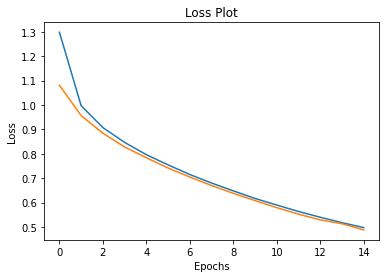

In [59]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

#### NOTE: 
* Since there is a difference between the train & test steps ( Presence of teacher forcing), you may observe that the train loss is decreasing while your test loss is not. 
* This doesn't mean that the model is overfitting, as we can't compare the train & test results here, as both approach is different.
* Also, if you want to achieve better results you can run it more epochs, but the intent of this capstone is to give you an idea on how to integrate attention mechanism with E-D architecture for images. The intent is not to create the state of art model. 

## Model Evaluation
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

In [102]:
attention_features_shape = bf.shape
def evaluate(image):
    
    attention_plot = np.zeros((max_length_seq, attention_features_shape[0]))
    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input) # Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features =  encoder(img_tensor_val)# extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tknzr.word_index['<start>']], 0)
    result = []

    for i in range(max_length_seq):
        
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)# get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy() #extract the predicted id(embedded value) which carries the max value
        #map the id to the word from tokenizer and append the value to the result list
        result.append(tknzr.index_word[predicted_id])
        if tknzr.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


In [63]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [64]:
from nltk.translate.bleu_score import sentence_bleu

In [65]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [68]:
img_test=path_test.copy()

In [71]:
img_test

17775    /kaggle/input/flickr8k/Images/2973269132_252bf...
13506    /kaggle/input/flickr8k/Images/270263570_3160f3...
4325     /kaggle/input/flickr8k/Images/2053006423_6adf6...
37870    /kaggle/input/flickr8k/Images/512101751_05a6d9...
21321    /kaggle/input/flickr8k/Images/3156406419_38fbd...
                               ...                        
3781     /kaggle/input/flickr8k/Images/1858963639_4588c...
26959    /kaggle/input/flickr8k/Images/3388836914_c267c...
15529    /kaggle/input/flickr8k/Images/2848895544_6d062...
36333    /kaggle/input/flickr8k/Images/431410325_f4916b...
31606    /kaggle/input/flickr8k/Images/3569284680_44fef...
Name: Path, Length: 8091, dtype: object

BELU score: 20.412414523193153
Real Caption: hild in kiddie pool splashes water sticks out tongue
Prediction Caption: young boy is playing in a blue kiddie pool


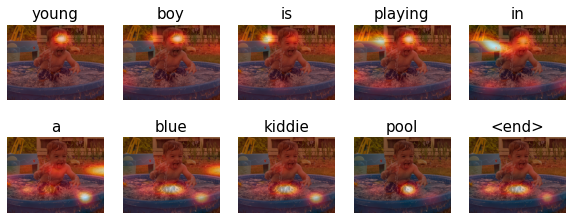

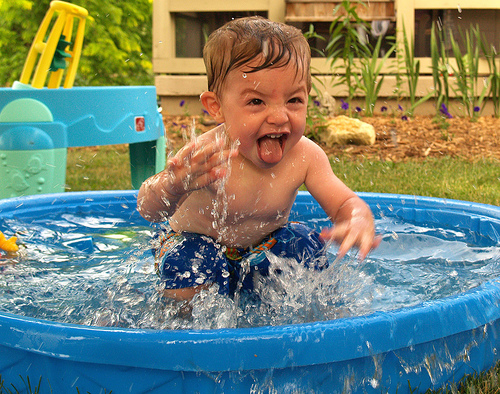

In [106]:
rid = np.random.randint(0, len(img_test))
test_image = img_test.iloc[rid] #/kaggle/input/flickr8k/Images
#test_image = '/kaggle/input/flickr8k/Images/413231421_43833a11f5.jpg'
#real_caption = '<start> black dog is digging in the snow <end>'

real_caption = ' '.join([tknzr.index_word[i] for i in cap_test.iloc[rid] if i not in [0]])
result, attention_plot,pred_test = evaluate(test_image)


real_caption=filt_text(real_caption)      

pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = pred_caption.split()

score = sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0))
print(f"BELU score: {score*100}")

print ('Real Caption:', real_caption)
print ('Prediction Caption:', pred_caption)
plot_attmap(result, attention_plot, test_image)


Image.open(test_image)